# Convert CLC to tiled vector data set

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import geopandas as gpd

from src import configs

## Manually executed steps in QGIS.

### Clip

QGIS Clip Raster by Mask Layer with 32UNU tile from 
  
INPUT:
  
*data/raw/CLC/clc2018_clc2018_v2018_20b2_raster100m/clc2018_clc2018_V2018.20b2.tif*
  
*data/raw/footprints/S2A_OPER_GIP_TILPAR_MPC_\_20151209T095117_V20150622T000000_21000101T000000_B00*

OUTPUT: 
  
*data/interim/CLC/clc2018_clc2018_v2018_20b2_raster100m_32UNU.tif*


### Polygonize

QGIS Polygonize

INPUT:
  
*data/interim/CLC/clc2018_clc2018_v2018_20b2_raster100m_32UNU.tif*
  
OUTPUT:
  
*data/interim/CLC/clc2018_clc2018_v2018_20b2_raster100m_32UNU.shp*

``gdal_polygonize.py data/interim/CLC/clc2018_clc2018_v2018_20b2_raster100m_32UNU.tif interim/CLC/clc2018_clc2018_v2018_20b2_raster100m_32UNU.shp -b 1 -f "ESRI Shapefile" None DN``

### Add unique Polygon IDs

QGIS Field Calculator in Attribute > create new field > Output field name: PID, Expression: @row_number

### Reproject

Reproject to EPSG 32623

INPUT:
  
*data/interim/CLC/clc2018_clc2018_v2018_20b2_raster100m_32UNU.shp*
  
OUTPUT:
  
*data/interim/CLC/clc2018_clc2018_v2018_20b2_raster100m_32UNU_epsg32623.shp*

### Calculate Area

...

## Steps executed in this notebook

### Get some subsets with small polygons

In [2]:
prjconf = configs.ProjectConfigParser()
path_clc_t32unu = prjconf.get_path("Interim", "rootdir") / "clc" / "clc2018_clc2018_v2018_20b2_raster100m_32UNU_epsg32623.shp"
prjconf.get_path("Interim", "ref20pix", tile="32UNU")

PosixPath('/home/ben/Devel/Projects/classify-hls/data/interim/clc/clc2018_clc2018_v2018_20b2_raster100m_32UNU_epsg32623_area200000.shp')

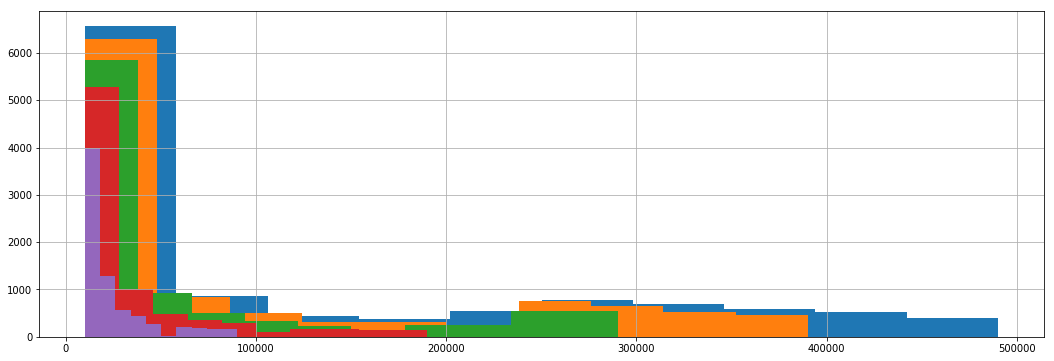

In [6]:
gdf = gpd.read_file(path_clc_t32unu)

ax = None
for i, area_threshold in enumerate([500000, 400000, 300000, 200000, 100000]):
    path_clc_t32unu_subset = prjconf.get_path("Interim", "rootdir") / "clc" / f"clc2018_clc2018_v2018_20b2_raster100m_32UNU_epsg32623_area{area_threshold}.shp"

    gdf_sub = gdf.loc[gdf["AREA"] < area_threshold]
    if not path_clc_t32unu_subset.exists():
        gdf_sub.to_file(path_clc_t32unu_subset)
    ax = gdf_sub["AREA"].hist(ax=ax, figsize=(18, 6))